In [163]:
import numpy as np
import pandas as pd
import pylab
import scipy.stats as stats
from math import sqrt
from scipy.special import stdtrit as tcrit
import matplotlib as plt

## Урок 6. Взаимосвязь величин. Параметрические и непараметрические показатели корреляции. Корреляционный анализ.

### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],  
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].  
Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy  
Полученные значения должны быть равны.  
Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков,
а затем с использованием функций из библиотек numpy и pandas.

### Решение:

In [136]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

# Method 1
M_zpks = (zp * ks).mean()
M_zp = zp.mean()
M_ks = ks.mean()
cov_1 = M_zpks - M_zp * M_ks

s_zp = sqrt(sum(map(lambda x: pow(x - M_zp, 2), zp)) / (zp.shape[0] - 1))
s_ks = sqrt(sum(map(lambda x: pow(x - M_ks, 2), ks)) / (ks.shape[0] - 1))
cor_1 = cov_2 / (s_zp * s_ks)

# Method 2
cov_2 = np.cov(zp, ks, ddof=1)[1][0]
cor_2 = np.corrcoef(zp, ks)[1][0]

# Method 3
cov_3 = pd.Series(zp).cov(pd.Series(ks))
cor_3 = pd.Series(zp).corr(pd.Series(ks))

# Method 4
cor_4 = stats.pearsonr(zp, ks)[0]

print(f'''
Parameter\t\thand\tnumpy\tpandas\tscipy
Covariation\t\t{cov_1:.6}\t{cov_2:.6}\t{cov_3:.6}\t-
Coeff. correlation\t{cor_1:.6}\t{cor_2:.6}\t{cor_3:.6}\t{cor_4:.6}
''')


Parameter		hand	numpy	pandas	scipy
Covariation		9157.84	10175.4	10175.4	-
Coeff. correlation	0.88749	0.88749	0.88749	0.88749



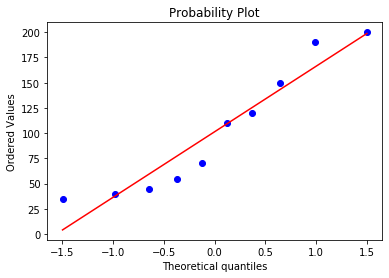

In [170]:
stats.probplot(zp, dist='norm', plot=pylab)
pylab.show()

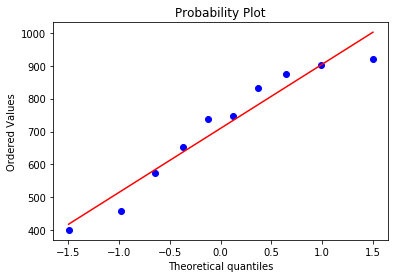

In [164]:
stats.probplot(ks, dist='norm', plot=pylab)
pylab.show()

### 2.  Измерены значения IQ выборки студентов, обучающихся в местных технических вузах:
131, 125, 115, 122, 131, 115, 107, 99, 125, 111.
Известно, что в генеральной совокупности IQ распределен нормально.
Найдите доверительный интервал для математического ожидания с надежностью 0.95.

### Решение:

In [171]:
sample = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])

alpha = 0.95
X = sample.mean()
t = tcrit(n - 1, alpha + (1 - alpha) / 2)
s = np.std(sample, ddof=1)
n = sample.shape[0]

T_1 = X - t * s / sqrt(n)
T_2 = X + t * s / sqrt(n)

print(f'''
Среднее выборочное: {X}
Критерий Стьюдента для выборки из {n} значений ({n - 1} степеней свободы) и с надежностью {alpha}: {t:0.7}
Несмещенное среднеквадратичное отклонение: {s}
Доверительный интервал с доверительной вероятностью 0.95: [{T_1:0.7}; {T_2:0.7}]
''')


Среднее выборочное: 118.1
Критерий Стьюдента для выборки из 10 значений (9 степеней свободы) и надежности 0.95: 2.262157
Несмещенное среднеквадратичное отклонение: 10.54566788359614
Доверительный интервал с доверительной вероятностью 0.95: [110.5561; 125.6439]



### 3. Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27, среднее выборочное составляет 174.2. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

### Решение:

In [173]:
D = 25
alpha = 0.95
n = 27
X = 174.2
Z = stats.norm.ppf(alpha + (1 - alpha) / 2)
s = sqrt(D)

T_1 = X - Z * s / sqrt(n)
T_2 = X + Z * s / sqrt(n)

print(f'''
Среднее выборочное: {X}
Z-критерий для выборки с надежностью {alpha}: {Z:0.7}
Несмещенное среднеквадратичное отклонение: {s}
Доверительный интервал с доверительной вероятностью 0.95: [{T_1:0.7}; {T_2:0.7}]
''')


Среднее выборочное: 174.2
Z-критерий для выборки с надежностью 0.95: 1.959964
Несмещенное среднеквадратичное отклонение: 5.0
Доверительный интервал с доверительной вероятностью 0.95: [172.314; 176.086]

